# Keras Regression Code Along Project 

Let's now apply our knowledge to a more realistic data set. Here we will also focus on feature engineering and cleaning our data!

Predicting house prices

## The Data

We will be using data from a Kaggle data set:

https://www.kaggle.com/harlfoxem/housesalesprediction

#### Feature Columns
    
* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

In [80]:
df = pd.read_csv('DATA/kc_house_data.csv')

# Exploratory Data Analysis

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.info()
# 21K records
# all features are numerical, except date

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null int64
view             21597 non-null int64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null int64
yr_built         21597 non-null int64
yr_renovated     21597 non-null int64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [6]:
# check for missing data
df.isnull().sum()
# no missing data

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


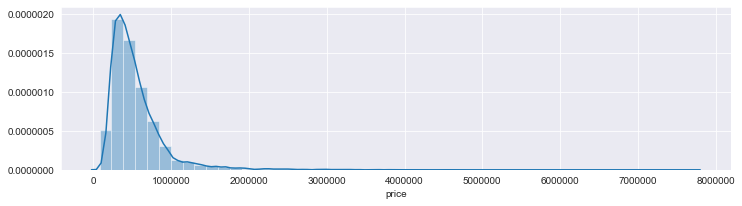

In [18]:
plt.figure(figsize=(12,3))
sns.distplot(df['price'], bins=50)
# majority of house prices fall between 0 and 1.5M
# outliers of expensive houses
# might make sense to drop the outliers if it's just a few extreme points

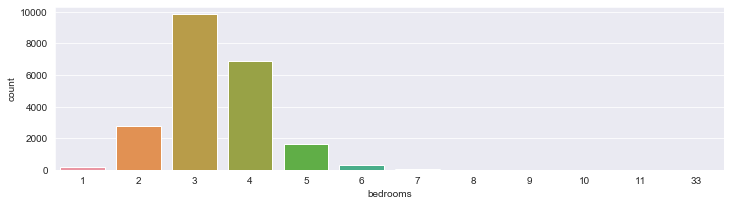

In [20]:
# countplot of bedrooms
plt.figure(figsize=(12,3))
sns.countplot(df['bedrooms'])
# majority houses are 2-5 beds
# there must be one mansion with 33 bedroom - extreme outliers

In [22]:
# see whats highly corr with price
df.corr()['price']
# sqft_living and grade, sqft_above, bathrooms high +ve corr
# explore high corr features through a scatterplot

id              -0.016772
price            1.000000
bedrooms         0.308787
bathrooms        0.525906
sqft_living      0.701917
sqft_lot         0.089876
floors           0.256804
waterfront       0.266398
view             0.397370
condition        0.036056
grade            0.667951
sqft_above       0.605368
sqft_basement    0.323799
yr_built         0.053953
yr_renovated     0.126424
zipcode         -0.053402
lat              0.306692
long             0.022036
sqft_living15    0.585241
sqft_lot15       0.082845
Name: price, dtype: float64

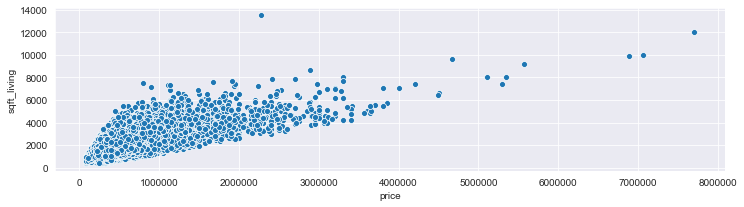

In [25]:
# scatter price vs sqft_living
plt.figure(figsize=(12,3))
sns.scatterplot('price', 'sqft_living', data=df)

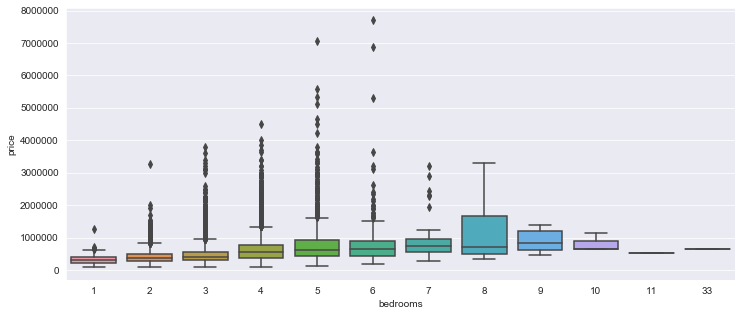

In [28]:
# boxplot price vs bedrooms
plt.figure(figsize=(12,5))
sns.boxplot('bedrooms', 'price', data=df)
# shows distribution of prices per bedroom
# outliers exists for 2-7 beds, large variety of prices there

### Geographical Properties

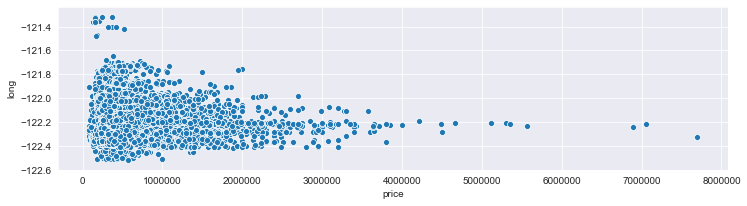

In [31]:
# scatter price vs long
plt.figure(figsize=(12,3))
sns.scatterplot('price', 'long', data=df)
# clear price variation based on longitude
# price varies by area
# long -122.2 seem to have more expensive houses

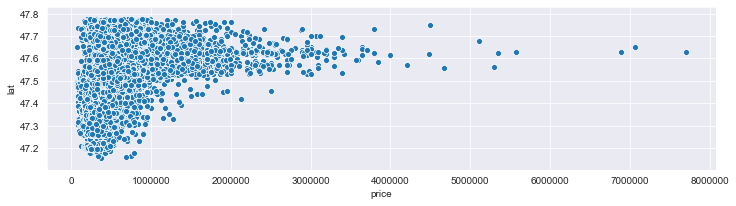

In [32]:
# scatter price vs lat
plt.figure(figsize=(12,3))
sns.scatterplot('price', 'lat', data=df)
# clear price variation based on longitude
# price varies by area
# lat 47.65 seem to have more expensive houses
# certain combo of lat and long seems to be show expensive areas

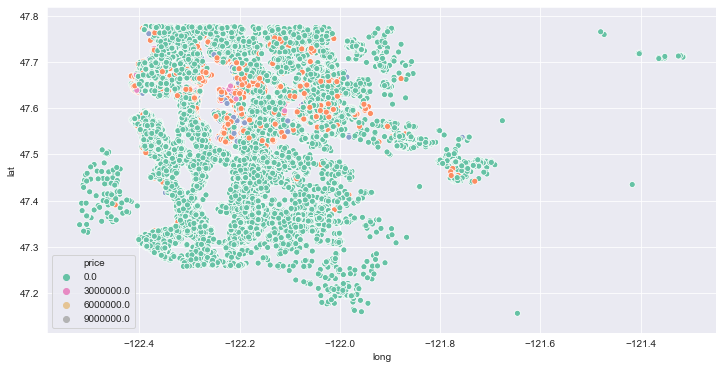

In [51]:
# scatter long vs lat to effectively create a map of King County Seattle
plt.figure(figsize=(12,6))
sns.scatterplot('long', 'lat', data=df, hue='price', palette='Set2')
# long -122.2, lat 47.65 has houses around th $3M+ mark
# no enough color gradient due to expensive outlier houses

In [57]:
df.sort_values('price', ascending=False).head(20)
# most expensive house is $7.7M which quickly drops to $3.6M within 20 houses

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [58]:
# sample out the top 1% of houses, to remove the outliers expensive houses
len(df)
# 21597 houses in DF, removing top 1% is the first 216 houses

21597

In [60]:
bottom_99_percent = df.sort_values('price', ascending=False)[216:]

In [61]:
len(bottom_99_percent)

21381

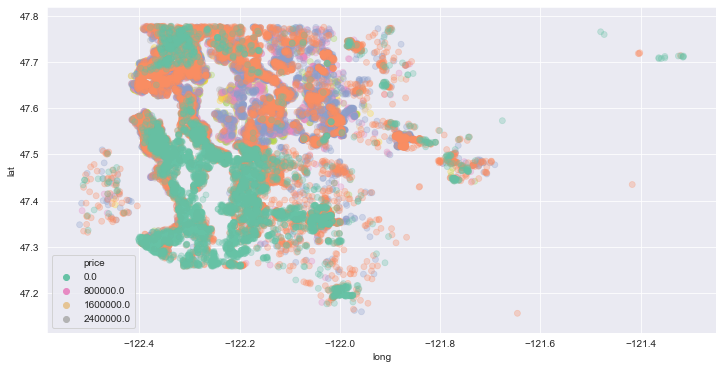

In [70]:
# scatter long vs lat for bottom 99% to effectively create a map of King County Seattle
plt.figure(figsize=(12,6))
sns.scatterplot('long', 'lat', data=bottom_99_percent, hue='price', palette='Set2', edgecolor=None, alpha=0.3)
# long -122.2, lat 47.65 has houses around th $3M+ mark
# better price variation after removing the top 1% (216) houses
# looks like houses on the edge of the water are more expensive, make sense

### Other Features

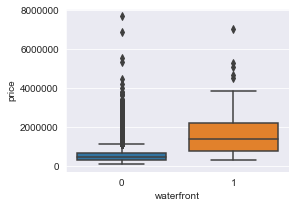

In [75]:
# boxplot price vs bedrooms
plt.figure(figsize=(4,3))
sns.boxplot('waterfront', 'price', data=df)
# higher avg price for waterfront properties

## Working with Feature Data - Feature Engineering

In [81]:
df.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639


In [82]:
# we can drop the ID column as it not a predictive feature
df = df.drop('id', axis=1)

In [83]:
df.head(2)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639


## Working with Feature Data

In [86]:
# check the date col
type(df['date'][0])
# date is a string, so needs to be converted to date format

str

In [87]:
df['date'] = pd.to_datetime(df['date'])

In [88]:
type(df['date'][0])
# date is now a timestamp

pandas._libs.tslibs.timestamps.Timestamp

In [92]:
df['date'][0].month

10

In [93]:
df['date'][0].year

2014

In [95]:
# add new cols for month and year
df['month'] = df['date'].apply(lambda date:date.month)

In [96]:
df['year'] = df['date'].apply(lambda date: date.year)

In [97]:
df.head(2)
# now we have 2 new cols for year and month

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,10,2014
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014


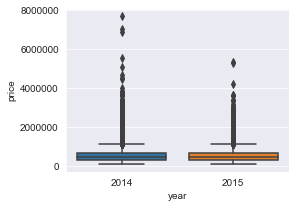

In [106]:
# see distribution of price by year
plt.figure(figsize=(4,3))
sns.boxplot('year', 'price', data=df)
# seems to be little change YoY but thought more outliers in 2014, more expensive houses in 2014

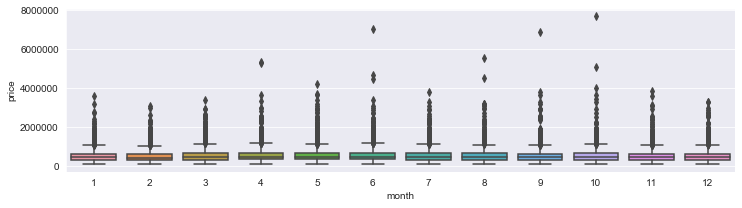

In [105]:
# see distribution of price by year
plt.figure(figsize=(12,3))
sns.boxplot('month', 'price', data=df)
# little variation of min, max, mean across months, thourgh outliers vary slightly

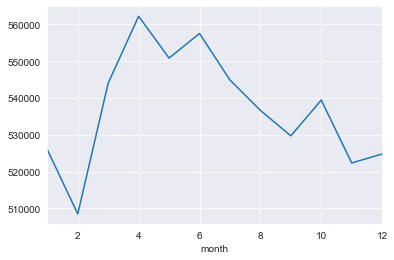

In [109]:
# line plot of mean price by month
df.groupby('month').mean()['price'].plot()
# varies by $50K

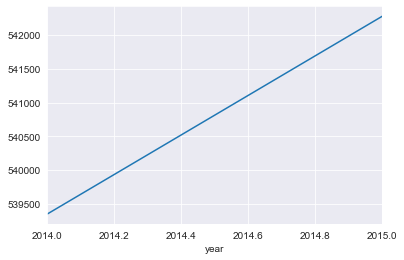

In [110]:
# line plot of mean price by year
df.groupby('year').mean()['price'].plot()
# varies by $3K
# inflation

In [111]:
# check other columns for predictive relevancy
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'month', 'year'],
      dtype='object')

In [112]:
# we can drop date as that's too granular to be predictive
df = df.drop('date', axis=1)

In [113]:
df.head(2)
# not much else to feature engineer
# mostly numerical features
# categorical features are already in dummy variable for i.e. 0 or 1
# Zipcode is numerical but is not a continuouse variable so we need to address this column

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,10,2014
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014


In [114]:
# https://i.pinimg.com/originals/4a/ab/31/4aab31ce95d5b8474fd2cc063f334178.jpg
# May be worth considering to remove this or feature engineer categories from it
# e.g. see corr between zipcode long/lat
# all depends on how zipcode is mapped out on a map, so this is where domain knowlege comes in
# doesnt seem to be a clear continuous distribution of zipcodes, so needs to be treated as categorical variable
df['zipcode'].value_counts()
# 70 unique zipcodes, probably too much to convert to dummy var through pd.get_dummies() to get 70 columns
# maybe group certain zipcode together to reduce the number of categories, maybe by North, East, West, South
# need to really look at a map

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [115]:
# for now we can drop
df = df.drop('zipcode', axis=1)

In [116]:
df.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,year
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,10,2014
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,12,2014


In [117]:
# yr_renovated might be troublesome 
df['yr_renovated'].value_counts()
# most values are zero, i.e. house was not renovated
# Zero is not a year
# might make sense to convert to categorical: renovated = 0 or 1
# however, the more recent the renovation the higher the valuation should be
# so might be better to keep this col as a numerical continuous

0       20683
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [118]:
# sqft_basement has lots to zeros, i.e. houses with no basement
df['sqft_basement'].value_counts()
# might be fine to keep this col as a numerical continuous
# having a basement, and larger one at that, should be predictive pf higher value

0       13110
600       221
700       218
500       214
800       206
        ...  
792         1
2590        1
935         1
2390        1
248         1
Name: sqft_basement, Length: 306, dtype: int64

## Scaling and Train Test Split

In [119]:
from sklearn.model_selection import train_test_split

In [122]:
# get numpy array of the dataframe, so there is no issue with data types
X = df.drop('price', axis=1).values

In [123]:
y = df['price'].values

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

### Scaling

In [125]:
# we'll do scaling post split, on the training data, to prevent data leakage from the test set
from sklearn.preprocessing import MinMaxScaler

In [126]:
# create an instance of MinMaxScaler
scaler = MinMaxScaler()

In [127]:
# Normalize Training data
# save time by fitting and transforming on the training data in one go
X_train = scaler.fit_transform(X_train)

In [130]:
# Normalize Test data
# transform only
# don't fit to test set as we don't want to assume prior info
X_test = scaler.transform(X_test)

In [131]:
X_train.shape

(15117, 19)

In [132]:
X_test.shape

(6480, 19)

## Creating a Model

In [134]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [135]:
# we'll have 3 layers with 4 neurons each, using Rectified Linear Unit (ReLu) activation function
# we'll have a final layer with 1 output neuron
# final layer is important, it will be determined by the data and what is being predicted

# create model
# base the number of neurons in the layers to the size of the features
# X_train.shape shows 19 features, so we'll have 19 neurons in our layers
# for now we'll manually set the number of layers and epoch, but explore early stopping later

model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
# adding 4 layers maybe overkill and we maybe overfitting our training data 
# we'll be able to check that by passing in validation data along with out training

model.add(Dense(1)) # one neurons that outputs predicted price

# select adam optimizer
# select MSE as loss function since this is a regression problem
model.compile(optimizer='adam',loss='mse')

## Training the Model

In [136]:
# fit the model to training data, with validation on the test data
# after each epoch, the model lost will be checked on the test data
# so we can keep track of how well performing the model is on both the training and test data
# the test data will not be taken into account in updating weights and biases, only the training data impacts w,b
# make sure that the data is in numpy array format, no pandas series/dataframe, so call '.values' if need be
# since this is a large data set, feed in the data in batches
# very typical to use batch sizes in powers of 2 i.e. 64, 128, 256
# smaller the batch size, the longer the training will take
# but less likely you'll overfit training data since we're not passing in training data all at once
# set an arbitrary number of epochs (no early stopping mechanism yet)
model.fit(x=X_train,y=y_train, validation_data=(X_test, y_test), batch_size=128, epochs=400)

Train on 15117 samples, validate on 6480 samples
Epoch 1/400
15117/15117 [==============================] - 1s 45us/sample - loss: 430226912552.3551 - val_loss: 418841070999.0716
Epoch 2/400
15117/15117 [==============================] - 0s 13us/sample - loss: 428293370586.7609 - val_loss: 412232518496.7111
Epoch 3/400
15117/15117 [==============================] - 0s 13us/sample - loss: 402383822833.3685 - val_loss: 354549163865.1259
Epoch 4/400
15117/15117 [==============================] - 0s 13us/sample - loss: 289466570960.2275 - val_loss: 190625296920.0197
Epoch 5/400
15117/15117 [==============================] - 0s 14us/sample - loss: 135489019786.9482 - val_loss: 98194312214.7556
Epoch 6/400
15117/15117 [==============================] - 0s 13us/sample - loss: 98945340819.1107 - val_loss: 94701924180.0691
Epoch 7/400
15117/15117 [==============================] - 0s 12us/sample - loss: 96789474335.9047 - val_loss: 92823569718.9926
Epoch 8/400
15117/15117 [=====================

15117/15117 [==============================] - 0s 14us/sample - loss: 37389217659.7748 - val_loss: 36200361609.7975
Epoch 65/400
15117/15117 [==============================] - 0s 13us/sample - loss: 37237290766.1742 - val_loss: 35955634256.9086
Epoch 66/400
15117/15117 [==============================] - 0s 14us/sample - loss: 37069332887.9201 - val_loss: 35795583466.5086
Epoch 67/400
15117/15117 [==============================] - 0s 13us/sample - loss: 36935063256.7965 - val_loss: 35650125434.6272
Epoch 68/400
15117/15117 [==============================] - 0s 13us/sample - loss: 36727384436.9671 - val_loss: 35503735638.5975
Epoch 69/400
15117/15117 [==============================] - 0s 14us/sample - loss: 36591810297.8527 - val_loss: 35581218123.2197
Epoch 70/400
15117/15117 [==============================] - 0s 13us/sample - loss: 36472585011.6335 - val_loss: 35202474353.1457
Epoch 71/400
15117/15117 [==============================] - 0s 14us/sample - loss: 36342196178.3444 - val_loss

15117/15117 [==============================] - 0s 18us/sample - loss: 32820025173.9768 - val_loss: 31412715434.0346
Epoch 128/400
15117/15117 [==============================] - 0s 18us/sample - loss: 32745878856.5985 - val_loss: 31476327421.4716
Epoch 129/400
15117/15117 [==============================] - 0s 19us/sample - loss: 32758650248.0016 - val_loss: 31302356885.8074
Epoch 130/400
15117/15117 [==============================] - 0s 18us/sample - loss: 32699686619.7092 - val_loss: 31355026737.9358
Epoch 131/400
15117/15117 [==============================] - 0s 17us/sample - loss: 32739501263.7534 - val_loss: 31240394741.8864
Epoch 132/400
15117/15117 [==============================] - 0s 17us/sample - loss: 32616200671.1808 - val_loss: 31314880552.4543
Epoch 133/400
15117/15117 [==============================] - 0s 18us/sample - loss: 32620061062.1727 - val_loss: 31156353322.3506
Epoch 134/400
15117/15117 [==============================] - 0s 16us/sample - loss: 32627077587.9362 - v

15117/15117 [==============================] - 0s 17us/sample - loss: 31404418000.1768 - val_loss: 29693596861.6296
Epoch 191/400
15117/15117 [==============================] - 0s 20us/sample - loss: 31356409269.3863 - val_loss: 29647623964.4444
Epoch 192/400
15117/15117 [==============================] - 0s 17us/sample - loss: 31378454796.4469 - val_loss: 29603798129.7778
Epoch 193/400
15117/15117 [==============================] - 0s 16us/sample - loss: 31321520808.0926 - val_loss: 29561396084.9383
Epoch 194/400
15117/15117 [==============================] - 0s 15us/sample - loss: 31319818807.7825 - val_loss: 29557677316.4247
Epoch 195/400
15117/15117 [==============================] - 0s 17us/sample - loss: 31287284572.8184 - val_loss: 29537322133.1753
Epoch 196/400
15117/15117 [==============================] - 0s 16us/sample - loss: 31289564921.8527 - val_loss: 29534796205.8272
Epoch 197/400
15117/15117 [==============================] - 0s 16us/sample - loss: 31241343440.4138 - v

Epoch 253/400
15117/15117 [==============================] - 0s 17us/sample - loss: 30592975998.0610 - val_loss: 28700192464.5926
Epoch 254/400
15117/15117 [==============================] - 0s 19us/sample - loss: 30632432370.2661 - val_loss: 28591995213.7481
Epoch 255/400
15117/15117 [==============================] - 0s 17us/sample - loss: 30551657353.3902 - val_loss: 28644458647.7037
Epoch 256/400
15117/15117 [==============================] - 0s 18us/sample - loss: 30595505834.0570 - val_loss: 28603578848.3951
Epoch 257/400
15117/15117 [==============================] - 0s 17us/sample - loss: 30531915509.7884 - val_loss: 28561820775.6642
Epoch 258/400
15117/15117 [==============================] - 0s 18us/sample - loss: 30535702224.9388 - val_loss: 28561652596.9383
Epoch 259/400
15117/15117 [==============================] - 0s 17us/sample - loss: 30534957955.2938 - val_loss: 28595483458.3704
Epoch 260/400
15117/15117 [==============================] - 0s 18us/sample - loss: 305107

15117/15117 [==============================] - 0s 17us/sample - loss: 30086313989.0126 - val_loss: 27905234761.9556
Epoch 317/400
15117/15117 [==============================] - 0s 17us/sample - loss: 30038282764.5655 - val_loss: 27947585323.6148
Epoch 318/400
15117/15117 [==============================] - 0s 17us/sample - loss: 30054542626.2587 - val_loss: 27955511164.5235
Epoch 319/400
15117/15117 [==============================] - 0s 17us/sample - loss: 30027539511.8164 - val_loss: 27869437537.3432
Epoch 320/400
15117/15117 [==============================] - 0s 19us/sample - loss: 29981874305.0415 - val_loss: 27927176108.5630
Epoch 321/400
15117/15117 [==============================] - 0s 17us/sample - loss: 29989439624.9669 - val_loss: 27860403045.7679
Epoch 322/400
15117/15117 [==============================] - 0s 20us/sample - loss: 30023800541.7752 - val_loss: 27836425906.2519
Epoch 323/400
15117/15117 [==============================] - 0s 18us/sample - loss: 30010945546.9736 - v

15117/15117 [==============================] - 0s 16us/sample - loss: 29505493219.7362 - val_loss: 27254266179.6346
Epoch 380/400
15117/15117 [==============================] - 0s 18us/sample - loss: 29539840677.4847 - val_loss: 27210849469.6296
Epoch 381/400
15117/15117 [==============================] - 0s 18us/sample - loss: 29500405554.7529 - val_loss: 27295896649.3235
Epoch 382/400
15117/15117 [==============================] - 0s 16us/sample - loss: 29512071128.8473 - val_loss: 27242089024.4741
Epoch 383/400
15117/15117 [==============================] - 0s 18us/sample - loss: 29491189553.3304 - val_loss: 27267989372.5235
Epoch 384/400
15117/15117 [==============================] - 0s 18us/sample - loss: 29520790173.2545 - val_loss: 27205353401.2049
Epoch 385/400
15117/15117 [==============================] - 0s 19us/sample - loss: 29482711820.2098 - val_loss: 27136214731.5358
Epoch 386/400
15117/15117 [==============================] - 0s 17us/sample - loss: 29480159442.6661 - v

In [138]:
# Expolore the history of historical losses
# a dictionary of the historical losses
losses = pd.DataFrame(model.history.history)

In [140]:
losses.head()
# we have loss on training data and validation data
# so we can compare loss on training vs test data to see if model is overfitting on the training data

,loss,val_loss
0,4.302269e+11,4.188411e+11
1,4.282934e+11,4.122325e+11
2,4.023838e+11,3.545492e+11
3,2.894666e+11,1.906253e+11
4,1.354890e+11,9.819431e+10


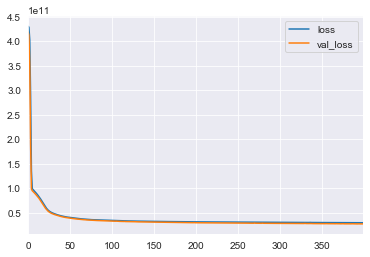

In [139]:
losses.plot()
# Decrease in both training and validatoin loss
# there is no subsequent increase/spike in validation curve toward the tail end
# this means model is not overfitting
# validation loss would start to increase if the model is overfitting
# that when you want to implement early stopping
# so in thoery we continue training with more than 400 epochs
# but there not much improvement towards the tailend 

# Evaluation on Test Data

https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

In [141]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

#### Predicting on Brand New Data

In [142]:
predictions = model.predict(X_test)

In [143]:
predictions

array([[404090.88],
       [597698.8 ],
       [568328.4 ],
       ...,
       [389594.97],
       [581412.9 ],
       [670435.5 ]], dtype=float32)

In [144]:
# MSE
mean_squared_error(y_test, predictions)
# very large value, make sense since we're dealing with house prices

27009114026.320362

In [145]:
# RMSE
np.sqrt(mean_squared_error(y_test, predictions))

164344.49801049125

In [146]:
# MAE
mean_absolute_error(y_test, predictions)
# this means on avg our predictions are about $100K off the true price
# is this good or bad?
# avg hourse price is $500K (max $7.7M, min $78K)
# so on avg, we're off by around 20% ($100K/$500K) - Not great!!

102080.809706549

In [150]:
df['price'].mean()

540296.5735055795

In [148]:
df['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [149]:
# Use explained variance score to get a deeper understanding of the evaluation metrics
# best possible score is 1.0
# this tells us how much variance is being explained by our model
explained_variance_score(y_test, predictions)
# our explained_variance_score is 0.8 
# this is ok
# we could keep training with more than 400 epochs and lowering the loss

0.7964016284667053

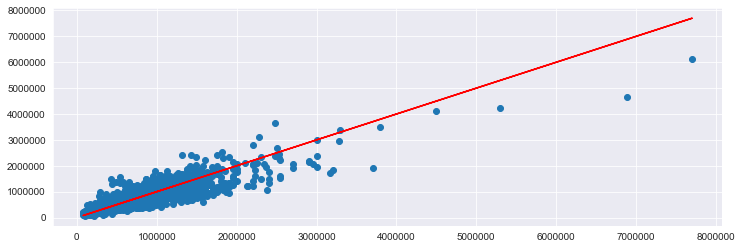

In [157]:
# we can plot the predictions against the perfect score
plt.figure(figsize=(12,4))
plt.scatter(y_test, predictions)

# Perfect predictions - straight line
plt.plot(y_test,y_test,'r')

# we're being punished by the outliers, the really expensive houses
# we're resonably good at predicint prices between 0 and $2M
# might be worth training the model on the bottom 99% of houses only

In [165]:
y_test.shape

(6480,)

In [162]:
errors = y_test.reshape(6480, 1) - predictions

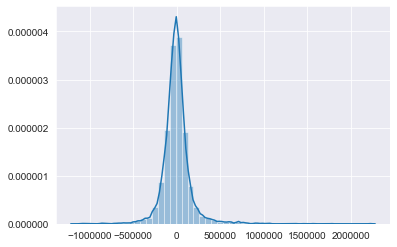

In [163]:
# distribution of errors is normal
sns.distplot(errors)

-------------
### Predicting on a brand new house

In [167]:
# take a features for a single house, dropping the price col
df.drop('price', axis=1).iloc[0]

bedrooms            3.0000
bathrooms           1.0000
sqft_living      1180.0000
sqft_lot         5650.0000
floors              1.0000
waterfront          0.0000
view                0.0000
condition           3.0000
grade               7.0000
sqft_above       1180.0000
sqft_basement       0.0000
yr_built         1955.0000
yr_renovated        0.0000
lat                47.5112
long             -122.2570
sqft_living15    1340.0000
sqft_lot15       5650.0000
month              10.0000
year             2014.0000
Name: 0, dtype: float64

In [186]:
house = df.drop('price', axis=1).iloc[0]

In [187]:
house

bedrooms            3.0000
bathrooms           1.0000
sqft_living      1180.0000
sqft_lot         5650.0000
floors              1.0000
waterfront          0.0000
view                0.0000
condition           3.0000
grade               7.0000
sqft_above       1180.0000
sqft_basement       0.0000
yr_built         1955.0000
yr_renovated        0.0000
lat                47.5112
long             -122.2570
sqft_living15    1340.0000
sqft_lot15       5650.0000
month              10.0000
year             2014.0000
Name: 0, dtype: float64

In [188]:
house.shape
# shape is off as there is only one set of brackets

(19,)

In [189]:
house.values.reshape(-1,19)
# now it's a numpy array with 2 sets of brackets
# -1 means keep the old dimensions along that axis

array([[ 3.00000e+00,  1.00000e+00,  1.18000e+03,  5.65000e+03,
         1.00000e+00,  0.00000e+00,  0.00000e+00,  3.00000e+00,
         7.00000e+00,  1.18000e+03,  0.00000e+00,  1.95500e+03,
         0.00000e+00,  4.75112e+01, -1.22257e+02,  1.34000e+03,
         5.65000e+03,  1.00000e+01,  2.01400e+03]])

In [190]:
# scale the features
house = scaler.transform(house.values.reshape(-1,19))

In [191]:
# predict
model.predict(house)
# prediction is $289,744

array([[289744.22]], dtype=float32)

In [192]:
# actual price is $221,900, so prediction is $67K off
df['price'][0]

221900.0